# 실습-1  
==================================================================  
<문제>  
가. 첨부된 data압축파일을 소스코드가 존재하는 day34폴더의 하위에 압축해제하세요.  
  
나. 아래의 두 셀은 33일차 실습-2와 실습-3-2입니다. 차례대로 수행하세요.  
- 노트북파일 상단의 '출력 지우기' 버튼을 클릭하세요.  
- 노트북파일 상단의 'Restart' 버튼을 클릭하세요.  
- 노트북파일 상단의 '모두 실행' 버튼을 클릭하세요.   
- 출력결과가 옳은지 확인하세요.  
  
다. 아래 3번셀 ~ 5번셀의 내용은 탐색적데이터분석_포트폴리오문제_해답_1단계 ~ 3단계입니다.  
- 이 소스코드 각 셀의 실행결과를 보면 학번과, 성명, 교과점스, 총점, 평균의 정보가 나열되어 있습니다  
- 실행결과의 성명 오른쪽에 주민등록번호 정보가 보이도록 수정하세요.  

라. 이상의 소스코드의 실행결과를 스샷작성하세요.  
==================================================================   

In [11]:
# 모든 열을 보고자 할 때 : pd.set_option('display.max_columns',None)
# 모든 행을 보고자 할 때 : pd.set_option('display.max_rows',None)

# 33일차-실습-2-해답
import datetime
from datetime import datetime, date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 250)
import os
import re
from re import findall, match, sub
#------------------ 이하 jumin_chk함수 ------------------#
def jumin_chk(jumin) :
    year = 0
    year_st ='평년'
    #print(jumin) 
    if (int(jumin[7]) == 1 or int(jumin[7]) == 2 ) and (21 <= int(jumin[0:2]) <= 99) : 
        year = int(jumin[0:2]) + 1900
    elif (int(jumin[7]) == 3 or int(jumin[7]) == 4) and (0 <= int(jumin[0:2]) <= 20) : 
        year = int(jumin[0:2]) + 2000
    elif  21 <= int(jumin[0:2]) <= 99 : 
        year = int(jumin[0:2]) + 1900
    else :
        year = int(jumin[0:2]) + 2000
    #--윤년체크 시작 
    month = [31,28,31,30,31,30,31,31,30,31,30,31]
    if year % 4 == 0 :
        if year % 100 == 0 :
            if year % 400 == 0:
                year_st = '윤년'
            else:
                year_st = '평년'
        else:
            year_st = '윤년'
    else:
        year_st = '평년'
    # 
    if year_st == '평년' : 
        month[1] = 28 # 평년에 해당하는 2월의 일 수
    else : 
        month[1] = 29 # 윤년에 해당하는 2월의 일 수
    #print(month)
    #--윤년체크 끝 
    # 
    #
    flag1_txt, flag2_txt, flag3_txt, flag4_txt , flag5_txt = '', '', '', '', ''
    result = match('[0-9]{6}-[1-4][0-9]{6}', jumin) 
    # print(result) 
    #------------------------------------------------------------------#
    if not(result) and len(jumin[0:]) > 14 : 
        flag1 = False  
        flag1_txt = '주민번호 길이오류/'
        if len(jumin[:jumin.index('-')]) > 6 :
            flag5 = False
            flag5_txt = '주민번호 앞자리 길이오류/'
        else: 
            flag5 = True
        #
        if len(jumin[jumin.index('-')+1:]) > 7 : 
            flag3 = False
            flag3_txt = '주민번호 뒷자리 길이오류/'
        else: 
            flag3 = True
        #
    else: 
        flag1 = True 
        flag5 = True
        flag3 = True
    #
    #------------------------------------------------------------------#
    if 1 <= int(jumin[2:4]) <= 12 : 
        flag2 = True
    else: 
        flag2 = False
        flag2_txt = '주민번호 앞자리 월 오류/'
    #
    if flag2 == True and year_st == '평년':
        if month[int(jumin[2:4])-1] < int(jumin[4:6]):
            flag4 = False
            flag4_txt = '주민번호 앞자리 월 오류/'
        else:
            flag4 = True
            
    if flag2 == True and year_st == '윤년':
        if month[int(jumin[2:4])-1] < int(jumin[4:6]):
            flag4 = False
            flag4_txt = '주민번호 앞자리 월 오류/'
        else:
            flag4 = True
    ####====####
    return_txt = ''
    if result and flag1 and flag2 and flag3 and flag4 and flag5 : 
        return jumin+' -->'+ year_st +'이면서','정상적인 주민번호'
    else :
        return_txt += flag1_txt + flag2_txt + flag3_txt + flag4_txt + flag5_txt
        return jumin+' -->'+ year_st +'이면서','비정상적인 주민번호 : '+ return_txt
#------------------ 이상 jumin_chk함수 ------------------#
#
#------------------ 이하 32일차-실습-3의 변경 및 추가 부분 ------------------#
jumin_ls0 = [] # 두 리스트를 합할 리스트
jumin_ls1 = [] # test210720_03.txt 파일을 담을 리스트 
jumin_ls2 = [] # test210720_03.csv 파일을 담을 리스트
try:
    t1 = open('data/test210720_03.txt', mode = 'r', encoding='UTF-8') #파일 오픈 
    jumin_lines1 = t1.readlines() # 라인단위로 읽어서 jumin_lines리스트에 저장함
except Exception as e:
    print('Error 발생 :',e)
finally :
    t1.close() # 파일 닫기
#
#print('jumin_lines1------------------->',jumin_lines1)
for line in jumin_lines1:  # jumin_lines의 각 요소의 끝에 붙어있는 줄바꿈 기호 \n를 지우기 위한 로직임
    jumin_ls1.append(line.strip())
#print('jumin_ls1-------->', jumin_ls1)
#
 
try:
    t2 = open('data/test210720_03.csv', mode = 'r', encoding='UTF-8') #파일 오픈 
    jumin_lines2 = t2.readlines() # 라인단위로 읽어서 jumin_lines리스트에 저장함
except Exception as e:
    print('Error 발생 :',e)
finally :
    t2.close() # 파일 닫기
#print('jumin_lines2------->', jumin_lines2)
#
for line in jumin_lines2:  # jumin_lines의 각 요소의 끝에 붙어있는 줄바꿈 기호 \n를 지우기 위한 로직임
    jumin_ls2.append(line.strip())
del jumin_ls2[0]  # 0번째 요소를 삭제 -> CSV포맷의 자료의 첫 번째행에는 컬럼명에 해당하는 데이터가 
    # 존재하는 경우가 있기에 이와 같은 데이터를 리스트로 만들이면 
    # 리스트의 0번 요소는 의미없는 데이터가 되므로 이를 삭제하기 위한 코드임
#
# 요소 안의 컴마를 하이픈으로 변경
for i in range(len(jumin_ls2)) :
    for char in ',' :
        jumin_ls2[i] = jumin_ls2[i].replace(char,'-')
#print('jumin_ls2----->', jumin_ls2) # 0번째 요소가 삭제성공했는지/ 컴마가 하이픈으로 변경되었는지 확인함 
#
# 리스트 두개를 연결하여 jumin_ls0에 붙임
jumin_ls0.extend(jumin_ls1)
jumin_ls0.extend(jumin_ls2)
#------------------ 이상 32일차-실습-3의 변경 및 추가 부분 ------------------#
#================== 이하 33일차-실습-2의 변경 및 추가 부분 ==================#
#
#-----------------------
# 이하 9 라인은 for i in range(len(jumin_ls0)) : 반복문 종속문장에서 append모드로 
# 파일을 열기 위한 사전작업의 개념으로 쓰기모드로 한 번 오픈하는 개념임 -> 
# 이하 9라인을 수행하면 /data/폴더에 jumin_Pass.txt 파일과 jumin_Fail.txt 파일이 
# 새롭게 한개씩 생성되는 개념임
try:
    with open('data/jumin_Pass.txt', mode='w',encoding='utf-8') as _pass:
        _pass.close()
    with open('data/jumin_Fail.txt', mode='w',encoding='utf-8') as _pass:
         _pass.close()
except Exception as e:
    print('Error 발생 :',e)
finally :
    pass
#-----------------------


#-----------------------
# 이하 28 라인은 반복문을 이용하여 Pass와 Fail 파일을 추가모드로 오픈하여 
# 정상 주민번호와 오류주민번호를 분리하여 저장하는 루틴임 
for i in range(len(jumin_ls0)) :
    jumin_out =''
    jumin_out = jumin_chk(jumin_ls0[i])  
    print('==>',jumin_out)
 
    #print(type(jumin_out)) # 함수에서 반환된 자료의 형식은 튜플임
    #print(len(jumin_out))  
    #print(jumin_out[1]) # 튜플의 요소 중에서 정상/ 비정상을 구분할 수 있는 내용은 1번 인덱스 요소임 
 
    if jumin_out[1][:4] == '정상적인' :
        # print('Pass', jumin_out[0])
        try:
            with open('data/jumin_Pass.txt', mode='a',encoding='utf-8') as _pass:
                _pass.write(   str(jumin_out[0][:str(jumin_out).find('-->')-3])     +'\n')
                # jumin_chk함수에서 반환된 튜플의 요소 내용에서 주민번호부분만 떼어낸 후 
                # 개행문자를 맨 끝에 붙여서 한 줄씩 파일에 저장하는 명령임
        except Exception as e:
            print('Error 발생 :',e)
        finally :
            pass
    else :  # jumin_out[1][:4] == '비정상적'인 경우임           
        # print('Fail', jumin_out[0])
        try:
            with open('data/jumin_Fail.txt', mode='a',encoding='utf-8') as _fail:
                _fail.write(      str(jumin_out[0][:str(jumin_out).find('-->')-3])      +'\n') 
        except Exception as e:
            print('Error 발생 :',e)
        finally :
            pass   
#-----------------------
#
try:
    with open('data/jumin_Pass.txt', mode = 'r', encoding = 'utf-8') as p1_r :
        print('\n\njumin_Pass.txt\n-----------------')
        print(p1_r.read())
    with open('data/jumin_Fail.txt', mode = 'r', encoding = 'utf-8') as p2_r :
        print('jumin_Fail.txt\n-----------------')
        print(p2_r.read())
except Exception as e:
    print('Error 발생 :',e)
finally :
    pass  
#
#================== 이상 33일차-실습-2의 변경 및 추가 부분 ==================#

==> ('200229-3234567 -->윤년이면서', '정상적인 주민번호')
==> ('190229-4234567 -->평년이면서', '비정상적인 주민번호 : 주민번호 앞자리 월 오류/')
==> ('720229-1234567 -->윤년이면서', '정상적인 주민번호')
==> ('730229-2234567 -->평년이면서', '비정상적인 주민번호 : 주민번호 앞자리 월 오류/')
==> ('190229-5234567 -->평년이면서', '비정상적인 주민번호 : 주민번호 앞자리 월 오류/')
==> ('191629-5234567 -->평년이면서', '비정상적인 주민번호 : 주민번호 앞자리 월 오류/')
==> ('191229-523456789 -->평년이면서', '비정상적인 주민번호 : 주민번호 길이오류/주민번호 뒷자리 길이오류/')
==> ('12456789-1234567 -->윤년이면서', '비정상적인 주민번호 : 주민번호 길이오류/주민번호 앞자리 월 오류/주민번호 앞자리 길이오류/')
==> ('770132-2110302 -->평년이면서', '비정상적인 주민번호 : 주민번호 앞자리 월 오류/')
==> ('781212-1328399 -->평년이면서', '정상적인 주민번호')
==> ('790307-2262722 -->평년이면서', '정상적인 주민번호')
==> ('780618-2258211 -->평년이면서', '정상적인 주민번호')
==> ('771009-2215327 -->평년이면서', '정상적인 주민번호')
==> ('780209-1573216 -->평년이면서', '정상적인 주민번호')
==> ('770515-2024213 -->평년이면서', '정상적인 주민번호')
==> ('770229-2651773 -->평년이면서', '비정상적인 주민번호 : 주민번호 앞자리 월 오류/')
==> ('800613-1078166 -->윤년이면서', '정상적인 주민번호')


jumin_Pass.txt
-----------------
200229-3234567
720

In [2]:
# 33일차-실습-3-2-해답
# 탐색적데이터분석_포트폴리오문제_해답_1단계_주민번호추가_중복실행에러방지
#
import datetime
from datetime import datetime, date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 250)
import os
from re import findall, match, sub
#
try:
    #
    #
    ls_jumin0=[]
    t_j0 = open('data/jumin_Pass.txt', mode = 'r', encoding="utf-8")
    ls_jumin0 = t_j0.readlines() # 텍스트 파일을 줄단위로 읽어서 리스트로 만들어 변수에 할당한다 
    t_j0.close()
    if len(ls_jumin0) < 10 :
        t_j1 = open('data/jumin_Pass.txt', mode = 'a', encoding="utf-8")
        t_j1.write('720711-2024219\n') # 텍스트 파일에 한 줄을 추가한다 
        t_j1.close()
    else:
        pass
    print('0----> : ',ls_jumin0)
    #
    #
    t_j2 = open('data/jumin_Pass.txt', mode = 'r', encoding="utf-8")
    ls_jumin = t_j2.readlines() # 텍스트 파일을 줄단위로 읽어서 리스트로 만들어 변수에 할당한다 
    t_j2.close()
    #
    print('1----> : ',ls_jumin)
    ls_jumin2=[]
    for line in ls_jumin:  # jumin_lines의 각 요소의 끝에 붙어있는 줄바꿈 기호 \n를 지우기 위한 로직임
        ls_jumin2.append(line.strip())
    print('2----> : ',ls_jumin2)
    #
    #
    t_name1 = open('data/name.txt', mode = 'r', encoding="utf-8")
    ls_name = t_name1.readlines() # 텍스트 파일을 줄단위로 읽어서 리스트로 만들어 변수에 할당한다 
    #
    #print('-'*40)
    name=[]
    hak=[]
    for line in ls_name :
        name.append(  findall('[가-힣]{2,}',line.strip())[0]  )  # findall('[가-힣]{2,}',line.strip() )
        hak.append(  findall('[0-9]{8,}',line.strip())[0]  )  # findall('[0-9]{3,}', st1) 
    #
except Exception as e:
    print('\nError 발생 : ', e)
finally:
    # 파일 객체 닫기
    t_name1.close()
    #t_j1.close()
    t_j2.close()
#
#
#
s0 = pd.Series(name, index= hak)
s01 = pd.Series(ls_jumin2, index= hak)
#s0
temps_df = pd.DataFrame(
    {
        'name' : s0,
        'jumin' : s01,
    }
)
print('-'*40)
temps_df


0----> :  ['200229-3234567\n', '720229-1234567\n', '781212-1328399\n', '790307-2262722\n', '780618-2258211\n', '771009-2215327\n', '780209-1573216\n', '770515-2024213\n', '800613-1078166\n']
1----> :  ['200229-3234567\n', '720229-1234567\n', '781212-1328399\n', '790307-2262722\n', '780618-2258211\n', '771009-2215327\n', '780209-1573216\n', '770515-2024213\n', '800613-1078166\n', '720711-2024219\n']
2----> :  ['200229-3234567', '720229-1234567', '781212-1328399', '790307-2262722', '780618-2258211', '771009-2215327', '780209-1573216', '770515-2024213', '800613-1078166', '720711-2024219']
----------------------------------------


,name,jumin
20180101,홍길동,200229-3234567
20180102,이순신,720229-1234567
20180103,강감찬,781212-1328399
20190101,이성계,790307-2262722
20190102,을지문덕,780618-2258211
20190103,연개소문,771009-2215327
20190104,안중근,780209-1573216
20200101,김구,770515-2024213
20200102,정도전,800613-1078166
20200103,이황,720711-2024219


# 아래 셀의 내용은 탐색적데이터분석_포트폴리오문제_해답_1단계 ~ 3단계입니다.  
- 이 소스코드 각 셀의 실행결과를 보면 학번과, 성명, 교과점스, 총점, 평균의 정보가 나열되어 있습니다  
- 성명정보 오른쪽에 주민등록번호 정보가 보이도록 수정하세요.  


In [3]:
# 탐색적데이터분석_포트폴리오문제_해답_1단계
import datetime
from datetime import datetime, date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 250)
import os
from re import findall, match, sub
#
try:
    t_name1 = open('data/name.txt', mode = 'r', encoding="utf-8")
    ls_name = t_name1.readlines() # 텍스트 파일을 줄단위로 읽어서 리스트로 만들어 변수에 할당한다 
    #
    #print('-'*40)
    name=[]
    hak=[]
    for line in ls_name :
        name.append(  findall('[가-힣]{2,}',line.strip())[0]  )  # findall('[가-힣]{2,}',line.strip() )
        hak.append(  findall('[0-9]{8,}',line.strip())[0]  )  # findall('[0-9]{3,}', st1) 
except Exception as e:
    print('\nError 발생 : ', e)
finally:
    # 파일 객체 닫기
    t_name1.close()
#
s0 = pd.Series(name, index= hak)
s0
temps_df = pd.DataFrame(
    {
        'name' : s0,
    }
)
print('@'*40)
temps_df


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


,name
20180101,홍길동
20180102,이순신
20180103,강감찬
20190101,이성계
20190102,을지문덕
20190103,연개소문
20190104,안중근
20200101,김구
20200102,정도전
20200103,이황


In [4]:
# 탐색적데이터분석_포트폴리오문제_해답_2단계
import os
try:
    t_kor = open('data/kor.txt', mode = 'r', encoding="utf-8")
    ln_kor = t_kor.readlines() # 텍스트 파일을 줄단위로 읽어서 리스트로 만들어 변수에 할당한다 
    k_hak=[]
    k_jum=[]
    for ln in ln_kor :
        k_hak.append(  ln.strip()[:8] )
        k_jum.append(  int(ln.strip()[9:]) )
    #
    t_eng = open('data/eng.txt', mode = 'r', encoding="utf-8")
    ln_eng = t_eng.readlines() # 텍스트 파일을 줄단위로 읽어서 리스트로 만들어 변수에 할당한다 
    e_hak=[]
    e_jum=[]
    for ln in ln_eng :
        e_hak.append(  ln.strip()[:8] )
        e_jum.append(  int(ln.strip()[9:]) )
    #
    t_mat = open('data/mat.txt', mode = 'r', encoding="utf-8")
    ln_mat = t_mat.readlines() # 텍스트 파일을 줄단위로 읽어서 리스트로 만들어 변수에 할당한다 
    m_hak=[]
    m_jum=[]
    for ln in ln_mat :
        m_hak.append(  ln.strip()[:8] )
        m_jum.append(  int(ln.strip()[9:]) )
    #
except Exception as e:
    print('\nError 발생 : ', e)
finally:
    # 파일 객체 닫기
    t_kor.close()
    t_eng.close()
    t_mat.close()

s1 = pd.Series(k_jum, index= k_hak)
s2 = pd.Series(e_jum, index= e_hak)
s3 = pd.Series(m_jum, index= m_hak)

print(s1)
print('^'*40)
#print(temps_df)
temps_df = pd.DataFrame(
    {
        'name' : s0,
        'kuk' : s1,
        'eng' : s2,
        'mat' :s3,
        'tot' : s1 + s2 + s3,
        'avg' : round((s1 + s2 + s3)/3,2)
    }
)
s4 = pd.Series(temps_df['avg'].rank(ascending=False).astype(int), index= m_hak)
    # rank() 함수의 결과는 실수를 반환하는데 이것을 정수로 변환하는 것이 .astype(int) 이다 
#print(s4)
temps_df = pd.DataFrame(
    {
        'name' : s0,
        'kuk' : s1,
        'eng' : s2,
        'mat' : s3,
        'tot' : s1 + s2 + s3,
        'avg' : round((s1 + s2 + s3)/3,2),
        'rank' : s4
    }
)
#print(s4)
temps_df

20180101     50
20180102     60
20180103    100
20190101     80
20190102     95
20190103     94
20190104     79
20200101     99
20200102     59
20200103     49
dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


,name,kuk,eng,mat,tot,avg,rank
20180101,홍길동,50,60,50,160,53.33,9
20180102,이순신,60,60,60,180,60.00,7
20180103,강감찬,100,90,90,280,93.33,4
20190101,이성계,80,80,90,250,83.33,5
20190102,을지문덕,95,95,95,285,95.00,2
20190103,연개소문,94,96,93,283,94.33,3
20190104,안중근,79,81,78,238,79.33,6
20200101,김구,99,100,98,297,99.00,1
20200102,정도전,59,61,58,178,59.33,8
20200103,이황,49,51,48,148,49.33,10


<Axes: >

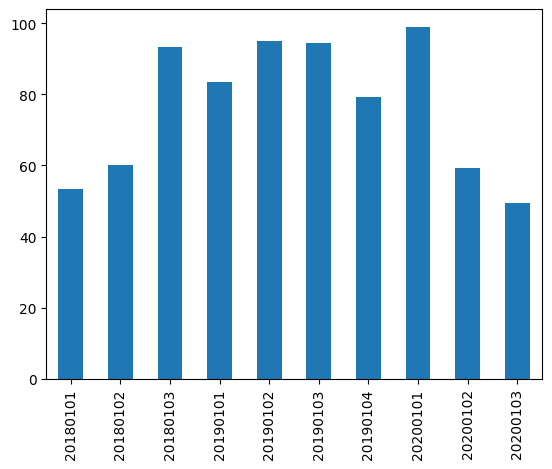

In [5]:
# 탐색적데이터분석_포트폴리오문제_해답_3단계
temps_df.avg.plot.bar()

In [6]:
temps_df

,name,kuk,eng,mat,tot,avg,rank
20180101,홍길동,50,60,50,160,53.33,9
20180102,이순신,60,60,60,180,60.00,7
20180103,강감찬,100,90,90,280,93.33,4
20190101,이성계,80,80,90,250,83.33,5
20190102,을지문덕,95,95,95,285,95.00,2
20190103,연개소문,94,96,93,283,94.33,3
20190104,안중근,79,81,78,238,79.33,6
20200101,김구,99,100,98,297,99.00,1
20200102,정도전,59,61,58,178,59.33,8
20200103,이황,49,51,48,148,49.33,10


In [38]:
temps_df = pd.DataFrame(
    {
        'name' : s0,
        'jumin' : s01,
        'kuk' : s1,
        'eng' : s2,
        'mat' : s3,
        'tot' : s1 + s2 + s3,
        'avg' : round((s1 + s2 + s3)/3,2),
        'rank' : s4
    }
)
# temps_df.reset_index().rename(columns={'index':'학번'}).set_index('학번')

In [39]:
temps_df

,name,jumin,kuk,eng,mat,tot,avg,rank
20180101,홍길동,200229-3234567,50,60,50,160,53.33,9
20180102,이순신,720229-1234567,60,60,60,180,60.00,7
20180103,강감찬,781212-1328399,100,90,90,280,93.33,4
20190101,이성계,790307-2262722,80,80,90,250,83.33,5
20190102,을지문덕,780618-2258211,95,95,95,285,95.00,2
20190103,연개소문,771009-2215327,94,96,93,283,94.33,3
20190104,안중근,780209-1573216,79,81,78,238,79.33,6
20200101,김구,770515-2024213,99,100,98,297,99.00,1
20200102,정도전,800613-1078166,59,61,58,178,59.33,8
20200103,이황,720711-2024219,49,51,48,148,49.33,10


In [41]:
temps_df.reset_index()

,index,name,jumin,kuk,eng,mat,tot,avg,rank
0,20180101,홍길동,200229-3234567,50,60,50,160,53.33,9
1,20180102,이순신,720229-1234567,60,60,60,180,60.00,7
2,20180103,강감찬,781212-1328399,100,90,90,280,93.33,4
3,20190101,이성계,790307-2262722,80,80,90,250,83.33,5
4,20190102,을지문덕,780618-2258211,95,95,95,285,95.00,2
5,20190103,연개소문,771009-2215327,94,96,93,283,94.33,3
6,20190104,안중근,780209-1573216,79,81,78,238,79.33,6
7,20200101,김구,770515-2024213,99,100,98,297,99.00,1
8,20200102,정도전,800613-1078166,59,61,58,178,59.33,8
9,20200103,이황,720711-2024219,49,51,48,148,49.33,10


In [43]:
import numpy as np
import pandas as pd

temps_avg = temps_df['avg']

# 정규화 
def normal(data):
    data_max = data.max()
    data_min = data.min()
    data = data.apply(lambda x : (x-data_min)/(data_max-data_min))
    return data

# 표준화
def std(data):
    data_mean = data.mean()
    data_std = data.std()
    data = data.apply(lambda x : (x-data_mean)/data_std)
    return data

temps_avg1 = normal(temps_avg)
temps_avg2 = std(temps_avg)

print('변환 전:')
print(temps_avg.head())
print('-'*30)
print('정규화변환 후:')
print(temps_avg1.head())
print('-'*30)
print('표준화변환 후:')
print(temps_avg2.head())

변환 전:
20180101    53.33
20180102    60.00
20180103    93.33
20190101    83.33
20190102    95.00
Name: avg, dtype: float64
------------------------------
정규화변환 후:
20180101    0.080532
20180102    0.214818
20180103    0.885847
20190101    0.684518
20190102    0.919468
Name: avg, dtype: float64
------------------------------
표준화변환 후:
20180101   -1.208415
20180102   -0.862501
20180103    0.866028
20190101    0.347417
20190102    0.952636
Name: avg, dtype: float64


In [52]:
import numpy as np
import pandas as pd

temps_avg = temps_df['avg']

# 정규화 
def normal(data):
    data_max = data.max()
    data_min = data.min()
    data = data.apply(lambda x : (x-data_min)/(data_max-data_min))
    return data

# 표준화
def std(data):
    data_mean = data.mean()
    data_std = data.std(ddof=0)
    data = data.apply(lambda x : (x-data_mean)/data_std)
    return data

temps_avg1 = normal(temps_avg)
temps_avg2 = std(temps_avg)

temps_avg3 = pd.DataFrame({
    'Normal' : temps_avg1,
    'STD' : temps_avg2})

temps_df2 = pd.concat([temps_df, temps_avg3], axis=1)

# 실행결과 1
temps_df2

# 실행결과 2
temps_df2['Normal'].plot(kind='bar')

# 실행결과 3
temps_df2['STD'].plot(kind='bar')

,name,jumin,kuk,eng,mat,tot,avg,rank,Normal,STD
20180101,홍길동,200229-3234567,50,60,50,160,53.33,9,0.080532,-1.273781
20180102,이순신,720229-1234567,60,60,60,180,60.00,7,0.214818,-0.909156
20180103,강감찬,781212-1328399,100,90,90,280,93.33,4,0.885847,0.912873
20190101,이성계,790307-2262722,80,80,90,250,83.33,5,0.684518,0.366210
20190102,을지문덕,780618-2258211,95,95,95,285,95.00,2,0.919468,1.004166
20190103,연개소문,771009-2215327,94,96,93,283,94.33,3,0.905979,0.967540
20190104,안중근,780209-1573216,79,81,78,238,79.33,6,0.603986,0.147544
20200101,김구,770515-2024213,99,100,98,297,99.00,1,1.000000,1.222832
20200102,정도전,800613-1078166,59,61,58,178,59.33,8,0.201329,-0.945783
20200103,이황,720711-2024219,49,51,48,148,49.33,10,0.000000,-1.492446


<Axes: >

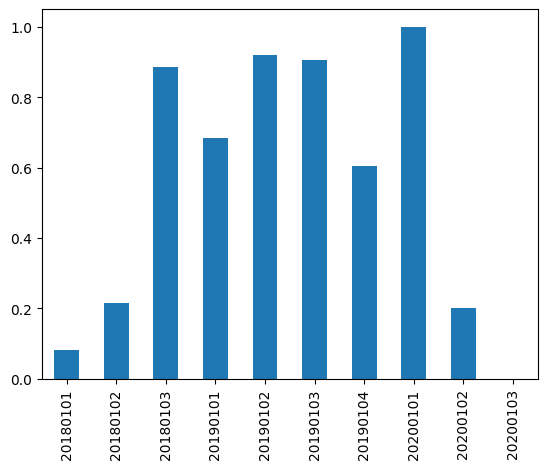

In [57]:
temps_df2['Normal'].plot(kind='bar')

<Axes: >

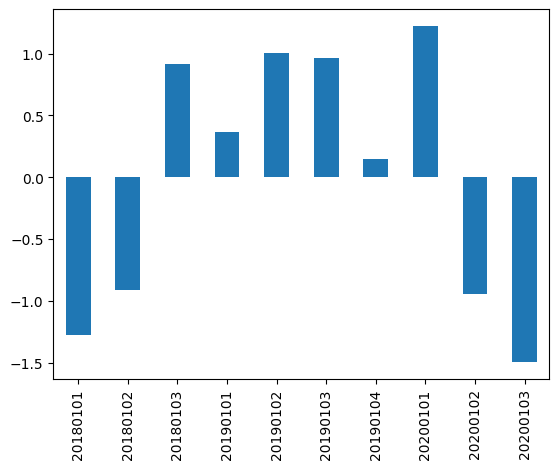

In [58]:
temps_df2['STD'].plot(kind='bar')